<a href="https://colab.research.google.com/github/mqc25/Cell_count/blob/master/DeterminePeaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
Determine Centroid Location

'''


### Imports
%matplotlib inline

import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import imageio

from PIL import Image  

import json
import pandas as pd

import csv

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
import pickle


In [2]:
'''
Data directories
'''

use_google_colab = 1 #toggle COLAB setup 
if (use_google_colab == 1):
    ############################################################################
    # Read Data from google drive
    ############################################################################
    from google.colab import drive #for loading gdrive data
    drive.mount('/content/gdrive')

    ###                     MAIN DIRECTORY NAMES
    gdir = '/content/gdrive/My Drive/'
    main_directory = gdir


    truth_dir = os.path.join(gdir,'BE224B_2020','SAMPLE_DATA','ground_truth')
    prediction_dir = os.path.join(gdir,'BE224B_2020','SAMPLE_DATA','prediction')


else:
    ############################################################################
    # Read Data from local drive
    ############################################################################
    print('INSERT LOCAL DRIVE INFO')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
'''
Get truth data information

'''
truth_list = os.listdir(truth_dir)

#read in csv data and store in a dictionary
csv_data ={}
for cname in truth_list:
    filename = os.path.join(truth_dir,cname)
    root_ext = os.path.splitext(cname) #will return two parts, name and ext
    short_name=root_ext[0]
    with open(filename) as csvfile:
        csv_data[short_name]=[]
        csv_reader = csv.reader(csvfile, delimiter=',')
        next(csv_reader, None)  # skip the header
        for row in csv_reader:
            #if line_count == 0:
            csv_data[short_name].append(np.array(row,dtype=float))


#y_true_142

csv_data['y_true_142'][0]

array([0.21873505, 0.27698747, 0.34114432, 0.40865087, 0.47610525,
       0.53949793, 0.59458351, 0.6373415 , 0.66445841, 0.67375138,
       0.66445841, 0.6373415 , 0.59458351, 0.53949793, 0.47610525,
       0.40865087, 0.34114432, 0.27698747, 0.21873505, 0.16800139,
       0.12549998, 0.16944599, 0.1077192 , 0.14419903, 0.18774476,
       0.23774401, 0.29281114, 0.35075339, 0.40865087, 0.4630621 ,
       0.51034318, 0.54704323, 0.57031823, 0.57829458, 0.57031823,
       0.54704323, 0.51034318, 0.4630621 , 0.40865087, 0.35075339,
       0.29281114, 0.23774401, 0.18774476, 0.14419903, 0.1077192 ,
       0.07826366, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07826366, 0.1077192 , 0.14419903,
       0.18774476, 0.23774401, 0.29281114, 0.35075339, 0.40865087,
       0.4630621 , 0.51034318, 0.54704323, 0.57031823, 0.57829

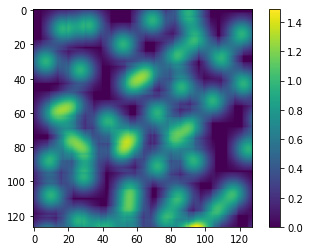

In [4]:
plt.imshow(csv_data['y_true_120'])
plt.colorbar()

(127, 128)
(127, 128)
coordinates:  [[121  77]
 [116 107]
 [113  55]
 [110  84]
 [109  56]
 [108 115]
 [108  10]
 [ 94  29]
 [ 91  72]
 [ 87  93]
 [ 87   9]
 [ 79  26]
 [ 77  54]
 [ 72  84]
 [ 65  43]
 [ 60  72]
 [ 58  17]
 [ 53 104]
 [ 45  86]
 [ 43 122]
 [ 40  62]
 [ 40  61]
 [ 35  27]
 [ 30   7]
 [ 28 109]
 [ 26  84]
 [ 20  52]
 [ 18  93]
 [ 14 121]
 [ 11  20]
 [  9  29]
 [  6  69]]


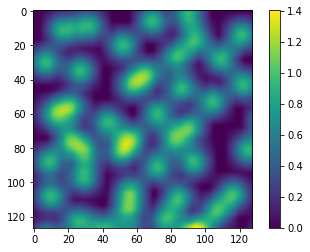

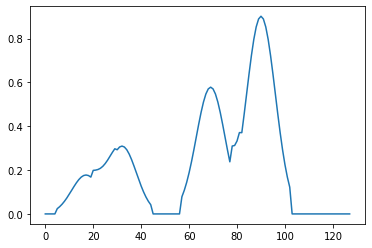

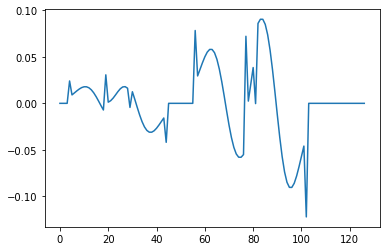

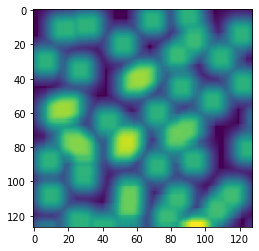

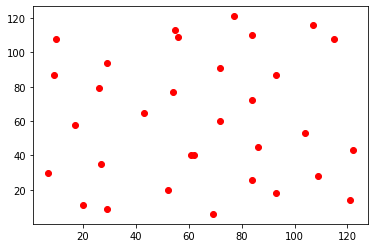

In [5]:
from scipy.ndimage import gaussian_filter, laplace
image = csv_data['y_true_120']
dv = np.gradient(csv_data['y_true_120'])

idv = gaussian_filter(image, sigma=1)

plt.imshow(idv)
plt.colorbar()

print(np.shape(csv_data['y_true_120']))
print(np.shape(image))

row = image[0][:]

plt.figure()
plt.plot(row)

d1 = np.diff(row)
plt.figure()
plt.plot(d1)


from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
image1 = img_as_float(image)
image_max = ndi.maximum_filter(image1, size=5, mode='constant')

plt.figure()
plt.imshow(image_max)

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(image1, min_distance=5)
print('coordinates: ',coordinates)


plt.figure()
for ii in coordinates:
    row = ii[0]
    col = ii[1]
    plt.plot(col,row,'ro')

In [0]:
def get_cross(data_in, row, col,dlength):
    #get a cross of data to test
    lowrow = row-dlength
    highrow = row + dlength
    lowcol = col - dlength
    highcol = col + dlength

    #get border limits
    nrow,ncol = np.shape(data_in)

    if ( (row - dlength ) < 0):
        #return a smaller value
        lowrow = 0
    if ( (row + dlength ) > nrow):
        #return a smaller value
        highrow = nrow
    if ( (col- dlength ) < 0):
        #return a smaller value
        lowcol = 0
    if ( (col + dlength ) > ncol):
        #return a smaller value
        highcol = ncol

    #print(lowrow,highrow,lowcol,highcol)
    row_data = data_in[lowrow:highrow,col]
    col_data = data_in[row,lowcol:highcol]

    return row_data,col_data


()


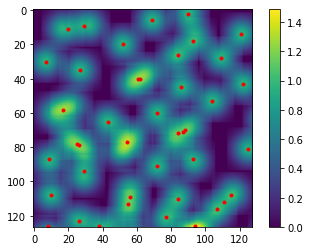

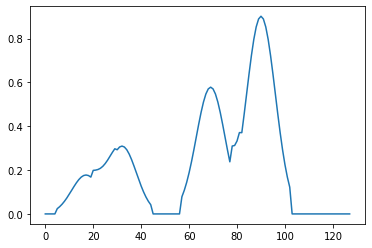

In [181]:
data = np.asmatrix(csv_data['y_true_120'])


peak_points ={}
for row in range(0,127):
    peak_points[row]=[]
    for col in range(0,127):
        if (row >= 0) and (col >=0):
            rdata,cdata = get_cross(data,row,col, 5)
            if (data[row,col] >= np.max(rdata)) and (data[row,col] >= np.max(cdata)) :
                #remove any points hovering around background values
                if (data[row,col] > (np.max(data)*0.2)):
                    peak_points[row].append(col)
            else:
                continue

print(np.shape(peak_points))

plt.imshow(csv_data['y_true_120'])
plt.colorbar()
for ii in peak_points.keys():
    for jj in peak_points[ii]:
        x=jj
        y=ii
        if (ii == 0):
            mark = 'bo'
        else:
            mark = 'r.'
        plt.plot(x,y,mark)


plt.figure()
f = np.array(data)
plt.plot(f[0,:])

In [174]:
print(np.max(rdata))
print(np.max(cdata))
print(np.max(data))

0.14221011043247267
0.19037052060142554
1.4862965830641086
